In [1]:
import pandas as pd
import numpy as np
import logging
import tensorflow as tf
import warnings
import glob
import os

from tqdm import tqdm
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from skimage.io import imread, imshow
from skimage.transform import resize

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Lambda, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
pip install gitpython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00


In [3]:
import git
import os

# URL of the GitHub repository
repo_url = "https://github.com/manuelamc14/waste-classification-model.git"

# Directory where you want to clone the repository
target_directory = "waste-classification-model"

# Clone the repository
if not os.path.exists(target_directory):
    git.Repo.clone_from(repo_url, target_directory)
    print("Repository cloned successfully!")
else:
    print("Repository already exists!")

Repository cloned successfully!


In [4]:
import os

# Directory paths for importing data
base_dir = "waste-classification-model/Resources/Dataset"
train_dir = os.path.join(base_dir, "Train")
test_dir = os.path.join(base_dir, "Test")

# Print the directory paths to verify
print("Base directory:", base_dir)
print("Train directory:", train_dir)
print("Test directory:", test_dir)

Base directory: waste-classification-model/Resources/Dataset
Train directory: waste-classification-model/Resources/Dataset/Train
Test directory: waste-classification-model/Resources/Dataset/Test


In [7]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Define directories
base_dir = "waste-classification-model/Resources/Dataset"
train_dir = os.path.join(base_dir, "Train")
test_dir = os.path.join(base_dir, "Test")

# Print directory paths
print("Base directory:", base_dir)
print("Train directory:", train_dir)
print("Test directory:", test_dir)

# Define data generators
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180, 180),  # Ensure that this matches the input shape of the first layer
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for one-hot encoded labels
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),  # Ensure that this matches the input shape of the first layer
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define the model
model4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Adjusted output layer for 2 classes with softmax activation
])

# Compile the model
model4.compile(optimizer='adam',
               loss='categorical_crossentropy',  # Use categorical crossentropy for one-hot encoded labels
               metrics=['accuracy'])

# Train the model with early stopping
history = model4.fit(train_generator,
                     epochs=20,
                     validation_data=test_generator,
                     callbacks=[early_stopping])



Base directory: waste-classification-model/Resources/Dataset
Train directory: waste-classification-model/Resources/Dataset/Train
Test directory: waste-classification-model/Resources/Dataset/Test
Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
Epoch 1/20
706/706 [==============================] - 39s 53ms/step - loss: 0.4191 - accuracy: 0.8184 - val_loss: 0.3226 - val_accuracy: 0.8719
Epoch 2/20
706/706 [==============================] - 36s 50ms/step - loss: 0.3533 - accuracy: 0.8534 - val_loss: 0.4110 - val_accuracy: 0.8337
Epoch 3/20
706/706 [==============================] - 37s 52ms/step - loss: 0.3158 - accuracy: 0.8689 - val_loss: 0.2749 - val_accuracy: 0.8989
Epoch 4/20
706/706 [==============================] - 37s 52ms/step - loss: 0.2653 - accuracy: 0.8927 - val_loss: 0.2817 - val_accuracy: 0.9061
Epoch 5/20
706/706 [==============================] - 38s 53ms/step - loss: 0.1984 - accuracy: 0.9212 - val_loss: 0.2826 - val_accuracy: 0.9069


In [8]:
# Display model summary
print(model4.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 20, 20, 128)      

In [10]:
# Retrieve the accuracy from the training history
train_accuracy = history.history['accuracy'][-1]  # Accuracy of the last epoch
print("Training Accuracy:", train_accuracy)



Training Accuracy: 0.9900283813476562


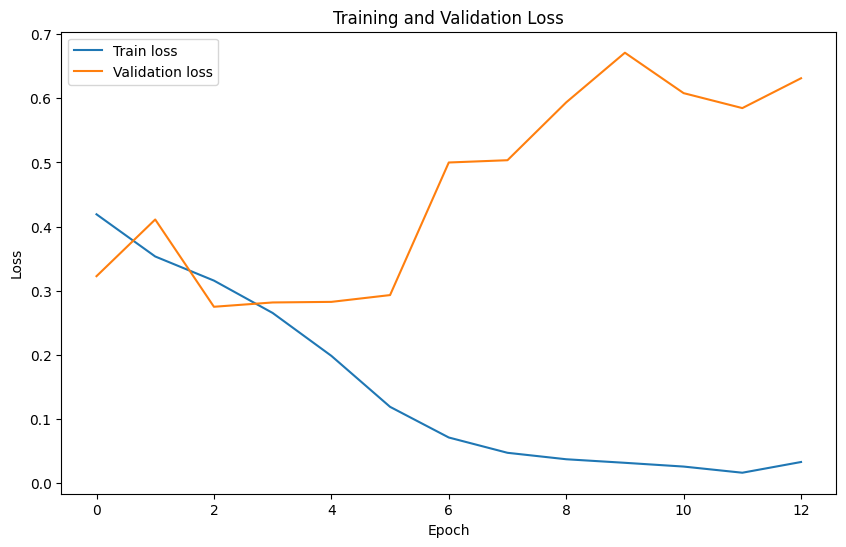

In [12]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label="Train loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()


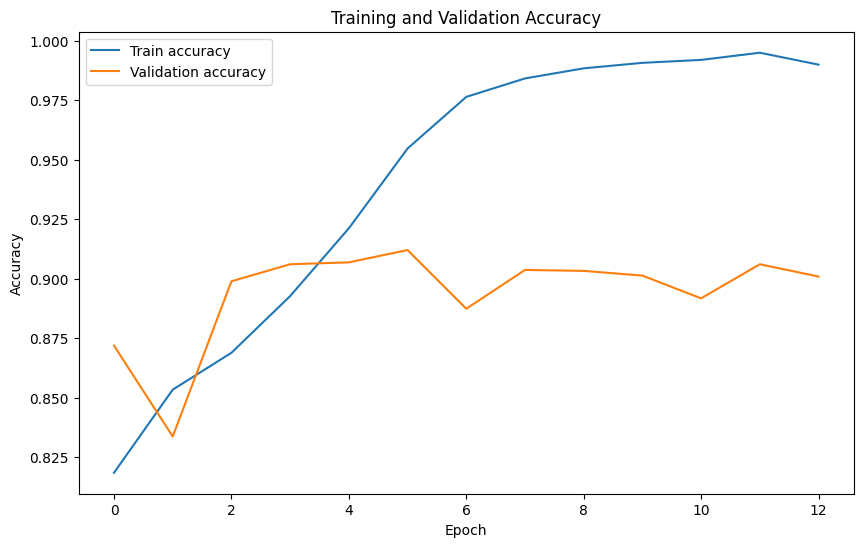

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10, 6])
plt.plot(history.history["accuracy"], label="Train accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()


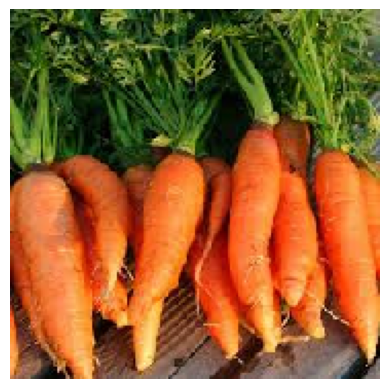

1/1 [==============================] - 0s 28ms/step
Predicted class: Organic Waste


In [15]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load an image for testing
img_path = '/content/O_12568 (2).jpg'  # Replace 'path_to_your_image.jpg' with the path to your image
img = image.load_img(img_path, target_size=(180, 180))  # Ensure that target_size matches the input shape of the model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Make predictions
predictions = model4.predict(img_array)

# Convert predictions to class labels
class_labels = ['Organic Waste', 'Recyclable Waste']
predicted_class = class_labels[np.argmax(predictions)]

# Print the predicted class
print("Predicted class:", predicted_class)


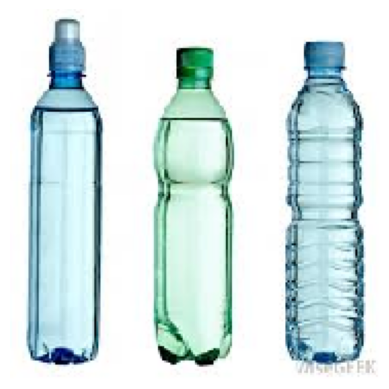

1/1 [==============================] - 0s 18ms/step
Predicted class: Recyclable Waste


In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load an image for testing
img_path = '/content/R_1005.jpg'  # Replace 'path_to_your_image.jpg' with the path to your image
img = image.load_img(img_path, target_size=(180, 180))  # Ensure that target_size matches the input shape of the model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Make predictions
predictions = model4.predict(img_array)

# Convert predictions to class labels
class_labels = ['Organic Waste', 'Recyclable Waste']
predicted_class = class_labels[np.argmax(predictions)]

# Print the predicted class
print("Predicted class:", predicted_class)